# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [20]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


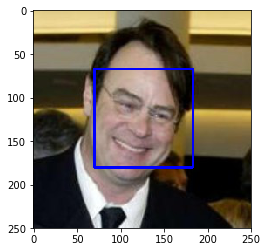

In [21]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [22]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

from collections import Counter

def face_detector_count(file_paths):
    files_face_detected = {img_path: face_detector(img_path) for img_path in file_paths}
    return files_face_detected, Counter(files_face_detected.values())

# Face Detection from Human Files
human_files_short_face_detected, human_files_short_face_count = face_detector_count(human_files_short)
print('Human Files - Detected Human Face: {}%, Not a Human Face: {}%'. 
       format(human_files_short_face_count[True], human_files_short_face_count[False]))

dog_files_short_face_detected, dog_files_short_face_count = face_detector_count(dog_files_short)
print('Dog Files - Detected Human Face: {}%, Not a Human Face: {}%'.
      format(dog_files_short_face_count[True], dog_files_short_face_count[False]))

Human Files - Detected Human Face: 98%, Not a Human Face: 2%
Dog Files - Detected Human Face: 17%, Not a Human Face: 83%



    What percentage of the first 100 images in human_files have a detected human face?
    [Ans] 98%
    What percentage of the first 100 images in dog_files have a detected human face?
    [Ans] 17%

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [4]:
!pip install dlib
import dlib

    100% |████████████████████████████████| 3.3MB 140kB/s eta 0:00:01
  Running setup.py bdist_wheel for dlib ... done
  Stored in directory: /root/.cache/pip/wheels/ce/f9/bc/1c51cd0b40a2b5dfd46ab79a73832b41e7c3aa918a508154f0
Successfully built dlib
You are using pip version 9.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

import dlib
from PIL import Image
from PIL import ImageFile

from skimage import io
import matplotlib.pyplot as plt

ImageFile.LOAD_TRUNCATED_IMAGES = True

def detect_faces(img_path):
   # Load image
    local_image = io.imread(img_path)

    # Create a face detector
    frontal_face_detector = dlib.get_frontal_face_detector()
    
    # Run detector and get bounding boxes of the faces on image.
    detected_faces = frontal_face_detector(local_image, 1)
    return local_image, detected_faces
    
def detect_face_frames(img_path):
    # Load image
    local_image, detected_faces = detect_faces(img_path)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]
    return local_image, face_frames

def face_detector_dlib(img_path):
    # Run detector and get bounding boxes of the faces on image.
    _, detected_faces = detect_faces(img_path)
    return len(detected_faces) > 0

def crop_face(img_path):
    local_image, face_frames = detect_face_frames(img_path)
   # local_image = io.imread(img_path)
    
    face_rect = next(iter(face_frames))
    face = Image.fromarray(local_image).crop(face_rect)
    return face
   
def show_crop_face(img_path):
    face = crop_face(img_path)
    
    ax0=plt.subplot(111)
    ax0.imshow(face)
    ax0.set_xticks(())
    ax0.set_yticks(())
    ax0.imshow(face)
    plt.show()
    
#show_crop_face('per_test_images/chan1.jpg')

In [7]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files = np.array(glob("/data/dog_images/valid/*/*"))
dog_files_short = dog_files[:100]


from collections import Counter

def face_detector_count(file_paths, model):
    files_face_detected = {img_path: model(img_path) for img_path in file_paths}
    return Counter(files_face_detected.values())

face_detector_model = {'cv2': face_detector,
                       'dlib': face_detector_dlib
                      }

face_detector_result = {}
for name, model in face_detector_model.items():        
    # Face Detection from Human Files
    human_files_short_face_count = face_detector_count(human_files_short, model)
    print('{}: Human Files - Detected Human Face: {}%, Not a Human Face: {}%'.
          format(name, human_files_short_face_count[True], human_files_short_face_count[False]))

    dog_files_short_face_count = face_detector_count(dog_files_short, model)
    print('{}: Dog Files - Detected Human Face: {}%, Not a Human Face: {}%'.
          format(name, dog_files_short_face_count[True], dog_files_short_face_count[False]))
    
    face_detector_result[name] = (human_files_short_face_count[True], dog_files_short_face_count[True])
                   
face_detector_result


cv2: Human Files - Detected Human Face: 98%, Not a Human Face: 2%
cv2: Dog Files - Detected Human Face: 18%, Not a Human Face: 82%
dlib: Human Files - Detected Human Face: 100%, Not a Human Face: 0%
dlib: Dog Files - Detected Human Face: 10%, Not a Human Face: 90%


{'cv2': (98, 18), 'dlib': (100, 10)}

## Human Face Detection Comparision - CV2 vs DLib

>> [Answer] Observed, DLib is giving better performance than CV2 for Face Detection

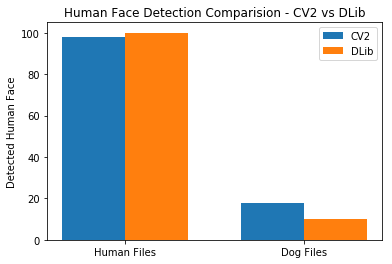

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N=2
ind = np.arange(N)
width = 0.35

plt.bar(ind, face_detector_result['cv2'], width, label='CV2')
plt.bar(ind + width, face_detector_result['dlib'], width, label='DLib')

plt.ylabel('Detected Human Face')
plt.title('Human Face Detection Comparision - CV2 vs DLib')

plt.xticks(ind + width / 2, ('Human Files', 'Dog Files'))
plt.legend(loc='best')

plt.show()
                             

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [23]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 122236861.95it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [24]:
from PIL import Image
import torchvision.transforms as transforms

from torch.autograd import Variable

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    transformer = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])
    
          
    img_pil = Image.open(img_path)
    img_tensor = transformer(img_pil)
    img_tensor.unsqueeze_(0)

    if use_cuda:
        img_tensor = img_tensor.cuda()
        
    img_variable = Variable(img_tensor)  
    output = VGG16(img_tensor)
    
    # take max argument
    index = output.data.cpu().numpy().argmax()
    return index # predicted class index

#dog_files = np.array(glob("dogImages/*/*/*"))
sample_dog_file = '/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg'
VGG16_predict(sample_dog_file)

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [25]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    index = VGG16_predict(img_path)
    return True if index in range(151, 268 + 1) else False # true/false

dog_detector(sample_dog_file)

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

def dog_detector_count(file_paths):
    files_dog_detected = {img_path: dog_detector(img_path) for img_path in file_paths}
    return files_dog_detected, Counter(files_dog_detected.values())

# Detecting Dog from Human Files
human_files_short_dog_detected, human_files_short_dog_count = dog_detector_count(human_files_short)
print('Human Files - Detected Dog: %s%%, Not a Dog: %s%%' 
      % (human_files_short_dog_count[True], human_files_short_dog_count[False]))

# Detecting Dog from Dog Files
dog_files_short_dog_detected, dog_files_short_dog_count = dog_detector_count(dog_files_short)
print('Dog Files - Detected Dog: %s%%, Not a Dog: %s%%'
     % (dog_files_short_dog_count[True], dog_files_short_dog_count[False]))

Human Files - Detected Dog: 0%, Not a Dog: 100%
Dog Files - Detected Dog: 96%, Not a Dog: 4%


- What percentage of the images in `human_files_short` have a detected dog?  
[Ans] 0%
- What percentage of the images in `dog_files_short` have a detected dog?  
[Ans] 98%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

from PIL import ImageFile

import torch
from torch.autograd import Variable

from torchvision import datasets
import torchvision.transforms as transforms

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

def transformer(img_size):
    transformer = transforms.Compose([transforms.Resize(img_size),
                                  transforms.CenterCrop(img_size),
                                  transforms.ToTensor(),
                                  normalize])
    return transformer


def get_data_loader(file_path, batch_size, img_size=224):
    transformer_local = transformer(img_size)
    image_dataset = datasets.ImageFolder(file_path, transform=transformer_local)
    data_loader = torch.utils.data.DataLoader(image_dataset, batch_size=batch_size, num_workers=0)
    test_images, _ = next(iter(data_loader))
    return test_images


In [14]:
def dog_detector_model_count(data, model, use_cuda):

    # move to GPU
    if use_cuda:
        model, data = model.cuda(), data.cuda()
        
    model.eval()
    # forward pass: compute predicted outputs by passing inputs to the model
    with torch.no_grad():
        output = model(data)

        # take max argument
        np_output = output.data.cpu().numpy()
        arg_max = np.argmax(np_output, axis=1)
        
        dog_count = len(arg_max[(151<= arg_max) & (arg_max <= 268)])
        return dog_count

In [15]:
import torchvision.models as models
import numpy as np
from glob import glob

# check if CUDA is available
use_cuda = torch.cuda.is_available() 

batch_size = 100
dog_dataset_default = get_data_loader('/data/dog_images/train/', batch_size)
human_dataset_default = get_data_loader('/data/lfw/', batch_size)

dog_dataset299 = get_data_loader('/data/dog_images/train/', batch_size, 299)
human_dataset299 = get_data_loader('/data/lfw/', batch_size, 299)

# define VGG16 model
models = {'vgg16': (models.vgg16(pretrained=True), dog_dataset_default, human_dataset_default),
          'resnet50': (models.resnet50(pretrained=True), dog_dataset_default, human_dataset_default),
          'inception_v3': (models.inception_v3(pretrained=True), dog_dataset299, human_dataset299)
         }

models_dog_count = {}
for name, (model, dog_dataset, human_dataset) in models.items():
    dog_count = dog_detector_model_count(dog_dataset, model, use_cuda)
    human_dog_count = dog_detector_model_count(human_dataset, model, use_cuda)
    print('model name: {}, dog count - {}, dog count in human - {}'.format(name, dog_count, human_dog_count))
    models_dog_count[name] = (dog_count, human_dog_count)

models_dog_count

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:06<00:00, 15737270.54it/s]
Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:02<00:00, 53193981.76it/s]


model name: vgg16, dog count - 100, dog count in human - 0
model name: resnet50, dog count - 100, dog count in human - 1
model name: inception_v3, dog count - 100, dog count in human - 0


{'vgg16': (100, 0), 'resnet50': (100, 1), 'inception_v3': (100, 0)}

## Comparing VGG16, ResNet50 and Inception_V3 for Detecting dog

   [Answer] Inception_V3 gave good performance than other models for larger data set  
            For Demo purpose, kept minimum batch_size for test data

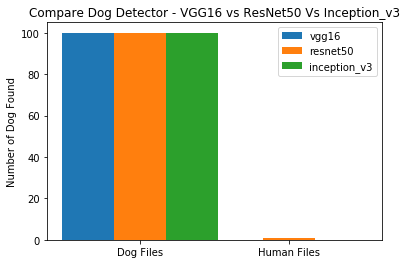

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N=2
width = 0.35
ind = np.arange(N)

plt.bar(ind, models_dog_count['vgg16'], width, label='vgg16')
plt.bar(ind+width, models_dog_count['resnet50'], width, label='resnet50')
plt.bar(ind+(2 * width), models_dog_count['inception_v3'], width, label='inception_v3')

plt.ylabel('Number of Dog Found')
plt.title('Compare Dog Detector - VGG16 vs ResNet50 Vs Inception_v3')

plt.xticks(ind+width, ('Dog Files', 'Human Files'))
plt.legend(loc='best')

plt.show()


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from PIL import ImageFile
from torchvision import datasets

import torch
from torch.autograd import Variable

import torchvision.transforms as transforms

ImageFile.LOAD_TRUNCATED_IMAGES = True


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform_train = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                normalize])
transform_test = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    normalize])

dirs = {'train': ('/data/dog_images/train/', transform_train),
       'valid': ('/data/dog_images/valid/', transform_test),
        'test': ('/data/dog_images/test/', transform_test)
       }

image_datasets = {x:datasets.ImageFolder(location, transform=transform) 
            for x, (location, transform) in dirs.items()}

batch_size = 32
num_workers=0
loaders_scratch = {x: torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True) 
           for x, dataset in image_datasets.items()}

# check if CUDA is available
use_cuda = torch.cuda.is_available()

use_cuda

False

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- How does your code resize the images (by cropping, stretching, etc)? What size did you pick for the input tensor, and why?
  >[Ans] Used RandomResizedCrop to resize the images.    
  > Size 224 * 224  
  >  Followed pre-trained model standard, 224 *224. Note, 299 * 299 is used for Inception_V3 model
  
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?
  > [Ans] Yes. Performed Augment for all datasets.  
  > Training Data - Peformed RandomRotation, RandomResizedCrop, RandomHorizontalFlip and Normalized  
    Validation & Testing Data - Performed Resize & CenterCrop and Normalized

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [46]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.norm32 = nn.BatchNorm2d(32)
        self.norm64 = nn.BatchNorm2d(64)
        self.norm128 = nn.BatchNorm2d(128)
        self.norm256 = nn.BatchNorm2d(256)
        self.norm512 = nn.BatchNorm2d(512)
        self.norm1024 = nn.BatchNorm2d(1024)

        self.dropout = nn.Dropout(p=0.2)
        
        self.layer1 = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(3, 32, kernel_size=5, stride=2, padding=1)),
            ('relu1', nn.ReLU()),
            ('norm1', self.norm32),
            
            ('maxpool1', self.max_pool),
            
             ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)),
            ('relu2', nn.ReLU()),
            ('norm2', self.norm64),
            
            ('maxpool2', self.max_pool)
        ]))
            
        self.layer2 = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('norm1', self.norm128),
            
            ('conv2', nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('norm2', self.norm256),
            
            ('pool2', self.max_pool),
            
            ('conv3', nn.Conv2d(256, 512, kernel_size=2, stride=1, padding=1)),
            ('relu3', nn.ReLU()),
            ('norm3', self.norm512),
            
            ('pool3', self.max_pool),
            
            ('conv4', nn.Conv2d(512, 1024, kernel_size=2, stride=1, padding=1)),
            ('relu4', nn.ReLU()),
            ('norm4', self.norm1024),
            
            ('pool4', self.avg_pool)
        ]))
                            
        self.fc1 = nn.Linear(4096, 2048)
        self.fc2 = nn.Linear(2048, 133)
        
            
    def forward(self, x):
        ## Define forward behavior 
        x = self.layer1(x)
        x = self.layer2(x)
        
        x = x.reshape(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

model_scratch

Net(
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (norm32): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm64): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm128): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm256): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm512): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm1024): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2)
  (layer1): Sequential(
    (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (relu1): ReLU()
    (norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool1): MaxPool2d(kernel_size=2, 

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Printed scratch model as output above. Following notes

1. Followed order like this Conv2d -> ReLU -> BatchNorm2D -> Pool -> Fully Connected Layer
2. Kernel Size -> gradually decresed width and hight. Kept kernel size is 5 in first Conv2d, then reduced till 2 in last Conv2d 
3. Filter -> Increased Filter not losing the spital information
4. Used Avg Pooling in end of model
5. Fully Connected Layer -> 2 Layers are used. Set output size is 133
6. Batch size - set optimal value - 32 after trying few less and more sizes
7. Loss Function - CrossEntropyLoss function is used for classification
8. Regularization -> BatchNorm is used for Feature Extraction Layer whereas DropOut is used in fully connected layer
9. Optimization -> Chosen SGD with momentum option. SGD is relatively better than Adam for basic scratch model classification
https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [47]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.002, momentum=0.9)
#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [48]:
import numpy as np

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss =  train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch: {}, Batch Index: {}, train_loss: {:.6f}'.format(
                    epoch, batch_idx, train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
                loss = criterion(output, target)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation Loss Decressed.... {:.6f} ---> {:.6f}...'.format(
            valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


In [49]:
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1, Batch Index: 0, train_loss: 4.907749
Epoch: 1, Batch Index: 100, train_loss: 4.850666
Epoch: 1, Batch Index: 200, train_loss: 4.774509
Epoch: 1 	Training Loss: 4.772892 	Validation Loss: 4.542497
Validation Loss Decressed.... inf ---> 4.542497...
Epoch: 2, Batch Index: 0, train_loss: 4.407780
Epoch: 2, Batch Index: 100, train_loss: 4.554386
Epoch: 2, Batch Index: 200, train_loss: 4.508699
Epoch: 2 	Training Loss: 4.504843 	Validation Loss: 4.328433
Validation Loss Decressed.... 4.542497 ---> 4.328433...
Epoch: 3, Batch Index: 0, train_loss: 4.465027
Epoch: 3, Batch Index: 100, train_loss: 4.375326
Epoch: 3, Batch Index: 200, train_loss: 4.339423
Epoch: 3 	Training Loss: 4.334578 	Validation Loss: 4.138421
Validation Loss Decressed.... 4.328433 ---> 4.138421...
Epoch: 4, Batch Index: 0, train_loss: 3.938940
Epoch: 4, Batch Index: 100, train_loss: 4.196032
Epoch: 4, Batch Index: 200, train_loss: 4.181783
Epoch: 4 	Training Loss: 4.179638 	Validation Loss: 4.050908
Validation Lo

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [50]:
# load the model that got the best validation accuracy
transfer_state_dict = torch.load('model_scratch.pt', map_location=lambda storage, loc: storage)

#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [6]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        with torch.no_grad():
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
#test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

In [52]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.883911


Test Accuracy: 27% (228/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [12]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [8]:
import torchvision.models as models
import torch.nn as nn
from collections import OrderedDict
import torch

# check if CUDA is available
use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

#print(model_transfer)
for param in model_transfer.parameters():
    param.requires_grad = False
    
num_features = model_transfer.fc.in_features

fc = nn.Sequential(OrderedDict([
        ('dropout1', nn.Dropout(p=0.2)),
        ('fc1', nn.Linear(num_features, 1024)),
        ('relu1', nn.ReLU()),
        ('dropout2', nn.Dropout(p=0.2)),
        ('fc2', nn.Linear(1024, 133))
]))
#model_transfer.fc = nn.Linear(num_features, 133)
model_transfer.fc = fc
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:05<00:00, 19515089.65it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

1. After going through this paper - http://noiselab.ucsd.edu/ECE228/Reports/Report18.pdf, ResNet50 is choosen as pretrained model. It is giving good result for classification use cases.
2. Optimizer - Used Adam. Adam is giving good performance than SGD for pre-trained model
3. Since new data set is small and similer to original training data, only replaced fully conntected layer  
4. 2 Linear layers with dropout regulariation. Set out size as 133 matched with dog classification usecase
5. Freezed Feature Extraction Layer and only enabled gradient for fully connected Layer. 
6. Set optimzed batch size 32 after evaulating with few other values

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [63]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [64]:
n_epochs=15
# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1, Batch Index: 0, train_loss: 4.971910
Epoch: 1, Batch Index: 100, train_loss: 4.063909
Epoch: 1, Batch Index: 200, train_loss: 3.162166
Epoch: 1 	Training Loss: 3.120399 	Validation Loss: 1.019664
Validation Loss Decressed.... inf ---> 1.019664...
Epoch: 2, Batch Index: 0, train_loss: 1.445806
Epoch: 2, Batch Index: 100, train_loss: 1.650244
Epoch: 2, Batch Index: 200, train_loss: 1.592066
Epoch: 2 	Training Loss: 1.590839 	Validation Loss: 0.713644
Validation Loss Decressed.... 1.019664 ---> 0.713644...
Epoch: 3, Batch Index: 0, train_loss: 1.617912
Epoch: 3, Batch Index: 100, train_loss: 1.410615
Epoch: 3, Batch Index: 200, train_loss: 1.382797
Epoch: 3 	Training Loss: 1.387635 	Validation Loss: 0.614601
Validation Loss Decressed.... 0.713644 ---> 0.614601...
Epoch: 4, Batch Index: 0, train_loss: 1.119052
Epoch: 4, Batch Index: 100, train_loss: 1.300320
Epoch: 4, Batch Index: 200, train_loss: 1.300604
Epoch: 4 	Training Loss: 1.301175 	Validation Loss: 0.619528
Epoch: 5, Bat

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [9]:
# load the model that got the best validation accuracy (uncomment the line below)
transfer_state_dict = torch.load('model_transfer.pt', map_location=lambda storage, loc: storage)

model_transfer.load_state_dict(transfer_state_dict)


In [66]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.415348


Test Accuracy: 86% (720/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [13]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image 

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path, image=None):
    # load the image and return the predicted breed
     
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    transformer = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])
    # Load, preprocess input image and give it to model
    img_pil = image  
    if image is None:
        img_pil = Image.open(img_path)
        
    img_tensor = transformer(img_pil)
    img_tensor.unsqueeze_(0)

    if use_cuda:
        img_tensor = img_tensor.cuda()
        
    img_variable = Variable(img_tensor)
    
    model_transfer.eval()
    with torch.no_grad():
        # predict output with model
        output = model_transfer(img_tensor)

        # take top5 prediction breed 
        torch_output = torch.nn.functional.softmax(output, dim=1)
        torch_output = torch_output.data.cpu().squeeze()

        top5_prob, top5_index = torch.topk(torch_output, 5)
        top5_prob_list, top5_index_list = top5_prob.numpy().squeeze().tolist(), top5_index.numpy().squeeze().tolist()

        # convert into map breed class & probability
        output_map = {class_names[index].replace(' ', '_'): float("{0:.4f}".format(prob)) 
                      for index, prob in zip(top5_index_list, top5_prob_list)}

        #output_np = top5_index.numpy().squeeze()
        return output_map
    


In [68]:
output_map  = predict_breed_transfer('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')
print(output_map)


{'Affenpinscher': 0.999, 'Brussels_griffon': 0.001, 'Cairn_terrier': 0.0, 'Pekingese': 0.0, 'Havanese': 0.0}


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [14]:
import random
from skimage import io, transform
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

dog_img_path = '/data/dog_images/train/*{}/*.jpg'

# Convert output map to Pandas Data Frame with order
def output_pd(output_map):
    output_pd = pd.DataFrame.from_dict(output_map, orient='index').reset_index()
    output_pd.columns = ['breed', 'prob']
    output_pd.sort_values(['prob'], ascending=False, inplace=True)
    return output_pd

# Return breed image path by breed class
def get_breed_img_path(breed):
    return np.array(glob(dog_img_path.format(breed)))

# Read image by image path
def img_reader(img_path):
    img = io.imread(img_path)
    img = transform.resize(img, (224, 224))
    return img

# Get single breed image by breed class
def get_single_breed_img(breed):
    img_list = get_breed_img_path(breed)
    single_image = img_reader(img_list[0])
    return single_image

# Show single image by path
def show_single_img(img_path):
    img = img_reader(img_path)
    fig = plt.figure(figsize=(12,6))
     # display image
    ax0=plt.subplot(111)
    ax0.imshow(img)
    ax0.set_xticks(())
    ax0.set_yticks(())
    plt.show()
    
# Get samples images to show by output map
def get_sample_img_to_show(output_map):
    output_map_df = output_pd(output_map)
    img_to_show = []
    for i in range(5):
        tmp_list = glob(dog_img_path.format(output_map_df.loc[i, 'breed']))
        tmp_selected = np.random.choice(tmp_list, int(1000 * output_map_df.loc[i, 'prob'])).tolist()
        img_to_show.append(tmp_selected)
    img_to_show = sum(img_to_show, [])
    if len(img_to_show) > 24:
        img_to_show = img_to_show[:24]
    random.shuffle(img_to_show)
    return img_to_show

# Show sample breeds in grid by output map and input image
def show_sample_breed(output_map, input_img):
    img_to_show = get_sample_img_to_show(output_map)
    
    imgs = [img_reader(img_path) for img_path in img_to_show]
    imgs.insert(12, input_img)
    
    fig = plt.figure(figsize=(8,8))
    
    for i, img in enumerate(imgs):
        sub = fig.add_subplot(5,5,i+1)
        sub.axis('off')
        sub.imshow(img)
        
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    return

#get_single_breed_img('Affenpinscher')
# output_map = {'Affenpinscher': 0.50, 'Brussels_griffon': 0.30, 'Cairn_terrier': 0.10, 
#               'Tibetan_mastiff': 0.10, 'Bouvier_des_flandres': 0.10}

# img_pil = img_reader('my_test_images/human_images/Al-Pacino.jpg')
# show_sample_breed(output_map, img_pil)

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns

# show top level result - input image, top 5 breeds, top most predicted breed
def show_result(input_img, output_map, output_img):
    fig = plt.figure(figsize=(12,6))
    
    # display input image
    ax0=plt.subplot(131)
    ax0.imshow(input_img)
    ax0.set_xticks(())
    ax0.set_yticks(())
    
    # display prob
    output_df = output_pd(output_map)
    ax1 = plt.subplot(132)
    sns.barplot(data=output_df, x='prob', y='breed')
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.set_xticks(np.arange(0.0, 1.2, 0.2))
   
    # display top most predicted breed
    ax2 = plt.subplot(133)
    ax2.imshow(output_img)
    ax2.set_xticks(())
    ax2.set_yticks(())
    #ax1.imshow(input_image)

    plt.subplots_adjust(wspace=0.75, hspace=0.75)
    plt.show()



In [16]:
def predict_breed(img_path, is_human = False):
    
    # crop face if human
    face = crop_face(img_path) if is_human else None
    
    # predict breed with transfer model
    output_map = predict_breed_transfer(img_path, face)
    
    # Display result
    output_df = output_pd(output_map)
    predicted_breed = output_df['breed'].iloc[0]

    print('Breed looks like: {}'.format(predicted_breed))
    print('Also, may be....')
    print("\n".join("{}\t{:.2%}".format(k, v) for k, v in output_map.items()))
    
    input_img = img_reader(img_path)
    output_img = get_single_breed_img(predicted_breed)
    
    # show input image, output, top most predicted image
    show_result(input_img, output_map, output_img)
    
    # show sample breed images with input image
    show_sample_breed(output_map, input_img)
    

In [17]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import time

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    is_dog = dog_detector(img_path)
    is_human = face_detector_dlib(img_path)
    
    if is_dog:
        print("Detected Dog....")
        breed_class = predict_breed(img_path)
    elif is_human:
        print("Deteced Human....")
        show_crop_face(img_path)
        resembled_breed_class = predict_breed(img_path, True)
    else:
        print("It is neither Dog nor Human.....")
        show_single_img(img_path)
        print('Try with different Dog or Human image..')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Yes. It is pretty good result as expected

Improvmenets
1. if input image contains multiple faces or dog breeds, good to crop all the faces and test it seperately 
2. if input image with noice, model is . Need to remove noise from input image with Autoencoder,  
   and also train model with generated noise trained data
3. Model is little more biased on color rather than human face shape. will try with advanced face detection algorithm  
   like http://blog.dlib.net/2014/08/real-time-face-pose-estimation.html
4. Capsule Network is more promisble model then usual CNN for computer vision It will give better result  
   https://arxiv.org/ftp/arxiv/papers/1805/1805.11195.pdf
5. Perform further turning on hyper parameters - weight initalization, batch_size,  
   optimizer & optimizerparameters, epoch etc.

Deteced Human....


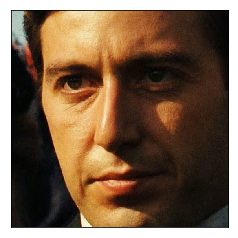

Breed looks like: Dogue_de_bordeaux
Also, may be....
Dogue_de_bordeaux	8.92%
Bedlington_terrier	5.77%
Brussels_griffon	5.02%
Maltese	4.69%
Bulldog	3.28%


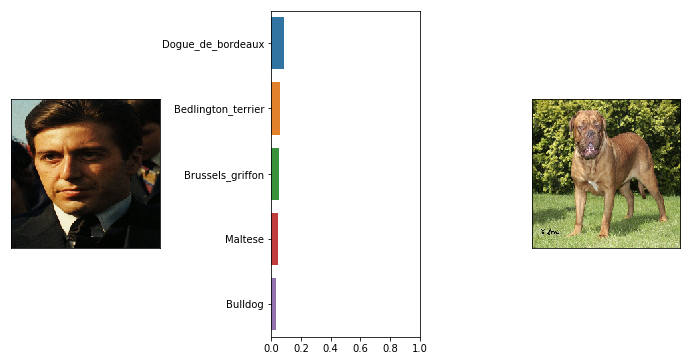

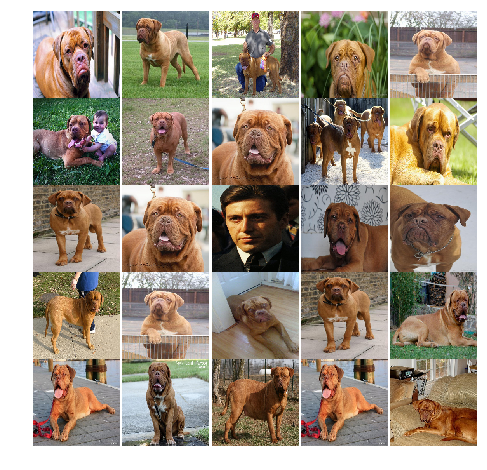

***********************************************************



Deteced Human....


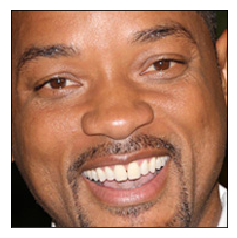

Breed looks like: Dogue_de_bordeaux
Also, may be....
Dogue_de_bordeaux	15.14%
Pharaoh_hound	7.89%
Ibizan_hound	6.89%
Bedlington_terrier	3.97%
Italian_greyhound	3.24%


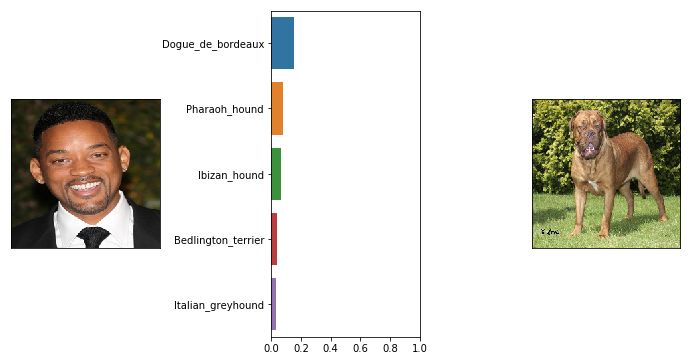

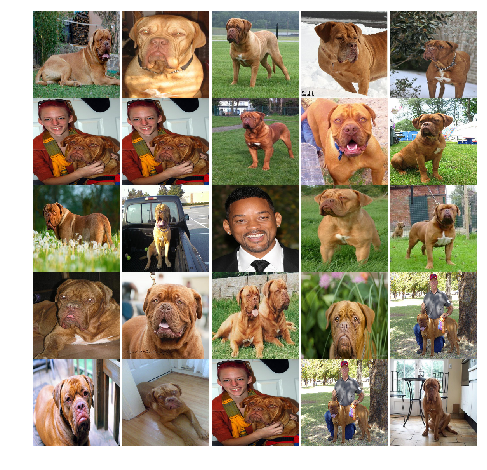

***********************************************************



It is neither Dog nor Human.....


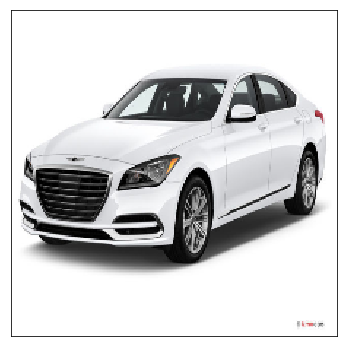

Try with different Dog or Human image..
***********************************************************



It is neither Dog nor Human.....


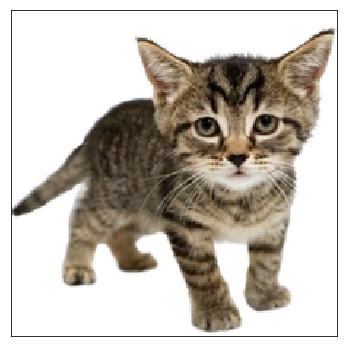

Try with different Dog or Human image..
***********************************************************



Detected Dog....
Breed looks like: American_staffordshire_terrier
Also, may be....
American_staffordshire_terrier	99.57%
Boxer	0.36%
Bull_terrier	0.05%
Bulldog	0.01%
Cane_corso	0.00%


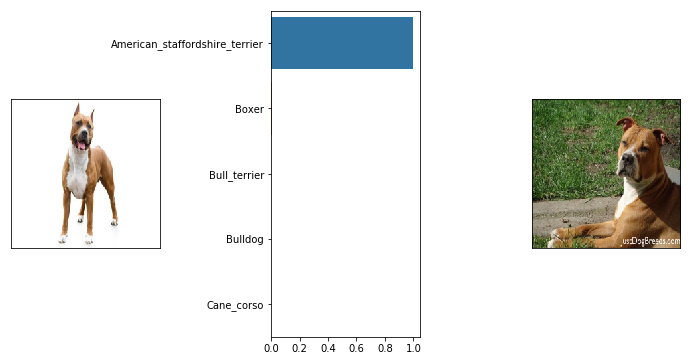

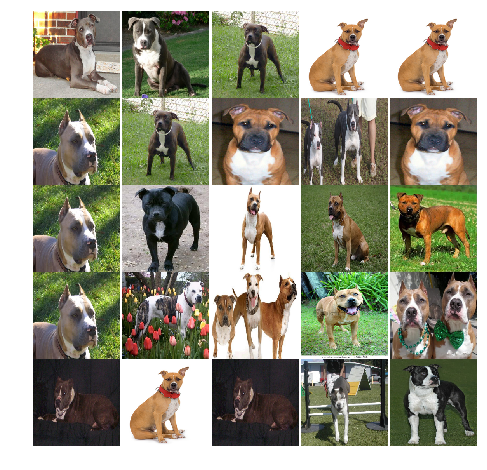

***********************************************************



Detected Dog....
Breed looks like: Dogue_de_bordeaux
Also, may be....
Dogue_de_bordeaux	92.41%
Chinese_shar-pei	6.88%
American_staffordshire_terrier	0.48%
Bulldog	0.08%
Cane_corso	0.08%


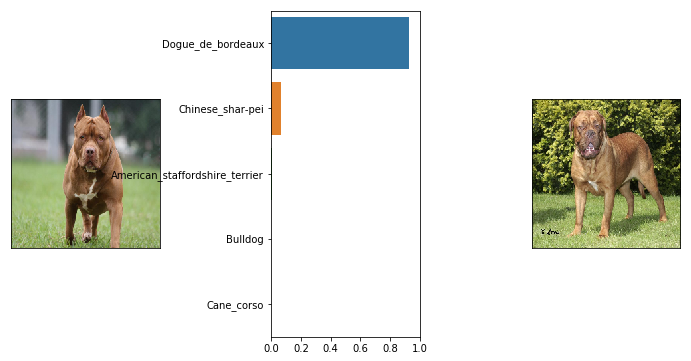

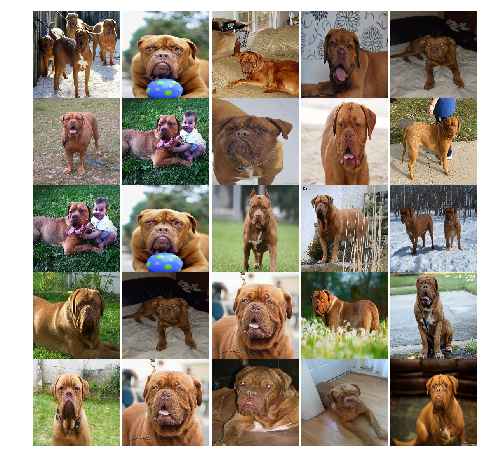

***********************************************************





In [27]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from glob import glob
import numpy as np

human_files = np.array(glob("my_test_images/human_images/*"))
dog_files = np.array(glob("my_test_images/dog_images/*"))

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
    print('***********************************************************')
    print('\n\n')